# **Data Visualization**

# Objectives


The objective of this notebook is to explore and understand the [IBM HR Analytics Employee Attrition & Performance dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)  through descriptive statistics and visual analysis. The focus is on uncovering key patterns and relationships among employee attributes that influence attrition and performance.

# Input
* The input can be found [here]()
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\employee-turnover-prediction\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\employee-turnover-prediction'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals
from scipy import stats # Import scipy for statistical tests
from scipy.stats import chi2_contingency # Import chi2_contingency for Chi-Squared test
import statsmodels.api as sm # Import statsmodels for logistic regression

---

# Load the cleaned dataset

In [6]:
# load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv'))
# display the first 5 rows of the dataframe
df.head()   

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2


---

# Work-Life Balance and Attrition
- Hypothesis: Employees with poor work-life balance are more likely to leave the company.
- Validation:

    - Data Preparation:
Encoded the target variable Attrition as binary (1 = Yes, 0 = No).

    - Descriptive Analysis:
Calculated and compared attrition rates across WorkLifeBalance categories.

    - Visualization:
Created a bar plot showing attrition rate by work-life balance level to observe trends.

    - Statistical Test:
Performed a Chi-square test of independence to check if attrition and work-life balance are significantly associated.

    - Logistic Regression:
Fitted a logistic regression model (Attrition_encoded ~ WorkLifeBalance) to quantify how work-life balance affects attrition odds.

- H₀: There is no significant relationship between work-life balance and employee attrition.

- H₁:
There is a significant relationship between work-life balance and employee attrition.

- Decision rule:

If p-value < 0.05, reject H₀ →  The relationship is statistically significant.

If p-value ≥ 0.05, fail to reject H₀ →  No significant relationship detected.

In [7]:
# confirm Attrition values are Yes/No
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Observations:
- Most employees did not leave (1233 stayed vs 237 left).
- Attrition rate overall = 237 / 1470 ≈ 16.1%.

In [8]:
# confirm WorkLifeBalance values are 1,2,3,4
df['WorkLifeBalance'].value_counts().sort_index()

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64

Observations:
- Work-Life Balance is recorded as ordinal values 1–4.
- Most employees report average balance (level 3: 893).

In [9]:
# create a binary column for Attrition
df['Attrition_encoded'] = df['Attrition'].map({'Yes':1, 'No':0})

In [10]:
#display the first 5 rows to confirm new column
df.head()

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5,1
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7,0
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0,1
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0,0
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2,0


Observations

- Encodes Attrition as numeric (1 = left, 0 = stayed).
- This allows calculation of attrition rates and enables logistic regression analysis.
- Confirms dataset is ready for statistical modeling.

In [11]:
# calculate attrition rate by WorkLifeBalance
attrition_by_wlb = df.groupby('WorkLifeBalance')['Attrition_encoded'].agg(['sum','count'])
attrition_by_wlb['attrition_rate'] = attrition_by_wlb['sum'] / attrition_by_wlb['count']
# print the result
attrition_by_wlb

,sum,count,attrition_rate
WorkLifeBalance,,,
1,25,80,0.312500
2,58,344,0.168605
3,127,893,0.142217
4,27,153,0.176471


Observations:

- Highest attrition rate is among employees with poor work-life balance (level 1: 31.3%).
- Employees with average balance (level 3) have the lowest attrition rate (14.2%).
- Slight increase at level 4 (17.6%), possibly due to smaller sample size (153).
- This supports the hypothesis: poor work-life balance is associated with higher attrition.

C:\Users\amron\AppData\Local\Temp\ipykernel_12308\248692176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_wlb.index, y='attrition_rate', data=attrition_by_wlb, palette='viridis')


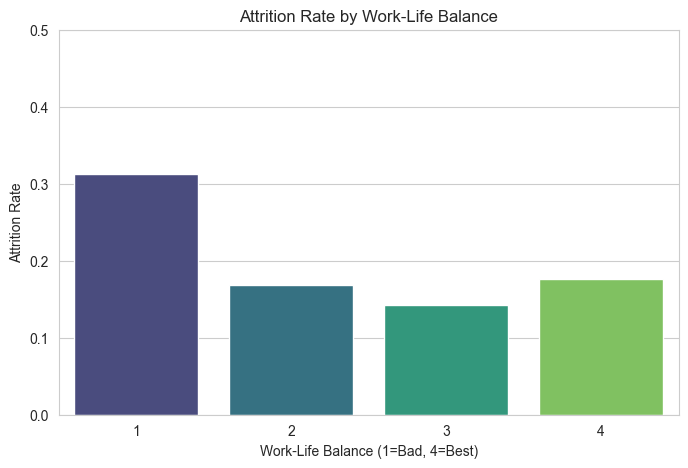

In [12]:
# bar plot of attrition rate by WorkLifeBalance
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_wlb.index, y='attrition_rate', data=attrition_by_wlb, palette='viridis')
plt.title('Attrition Rate by Work-Life Balance')
plt.xlabel('Work-Life Balance (1=Bad, 4=Best)')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.5)
plt.show()


Observations:

- Visualization confirms inverse relationship: lower work-life balance → higher attrition, except for minor fluctuation at level 4.
- Makes the trend immediately visible: poor work-life balance is linked with higher turnover risk.
- Helps communicate findings to stakeholders clearly.

In [13]:
# create wlb_attrition_crosstab table
wlb_attrition_crosstab = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
# print wlb_attrition_crosstab table
wlb_attrition_crosstab

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


Observations:

- Confirms raw counts match the attrition rates calculated earlier.
- Provides input for the Chi-square test to formally test association.
- Clearly shows that number of leavers decreases as Work-Life Balance improves, especially between levels 1 and 3.

In [14]:
# perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(wlb_attrition_crosstab)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 16.325
Degrees of freedom: 3
P-value: 0.0010


Observations:

- P-value = 0.001 < 0.05 → reject null hypothesis.
- Indicates a statistically significant association between Work-Life Balance and Attrition.
- Confirms the hypothesis that employees with poor work-life balance are more likely to leave.
- Effect size is moderate (chi-square 16.325 with 3 df), supporting practical significance as well.

In [15]:
# define variables
X = sm.add_constant(df['WorkLifeBalance'])  # add constant term (intercept)
y = df['Attrition_encoded']

# fit logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.439689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Attrition_encoded   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                0.004541
Time:                        14:10:33   Log-Likelihood:                -646.34
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.01517
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9974      0.272     -3.667      0.000      -1.530      -0.464
WorkLifeBalanc

Observations:
- A logistic regression was conducted to examine the relationship between Work-Life Balance and employee attrition.
- Results indicated that Work-Life Balance was a significant predictor of attrition (β = -0.24, p = 0.014).
- The odds ratio of 0.79 suggests that for each one-unit increase in Work-Life Balance, the odds of leaving the company decrease by approximately 21%, supporting the hypothesis that better work-life balance reduces employee attrition.

### Overall Insights:
- Overall attrition in the company is relatively low (~16%), with 237 employees leaving out of 1,470.
- Work-Life Balance is recorded on a 1–4 scale, with most employees reporting average balance (level 3: 893 employees).
- Employees with poor work-life balance (level 1) have the highest attrition rate (31.3%).
- Attrition decreases for employees with average balance (level 3: 14.2%).
- The association between Work-Life Balance and Attrition is statistically significant (χ² = 16.325, df = 3, p = 0.001).
- Bar chart provides an intuitive, visual confirmation of the statistical findings.
- Work-Life Balance is a significant predictor of attrition (β = -0.24, p = 0.014).

### Conclusion: 
Statistical and visual analyses confirm that better work-life balance reduces employee attrition, supporting the hypothesis.